In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import math

#--- plot parameters --- 
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'

# Intial Expressions, 

## $$E_x (x_0, t_0)= \frac{\lambda}{4 \pi \epsilon_0} \int^L_{-L} dy \frac{x_0}{r^3} = \frac{\lambda}{4 \pi \epsilon_0} \int^L_{-L} dy \frac{x_0}{((y_o - y)^2 + x^2_0)^{3/2}} $$ 

#### Summation Approximation,

 $$ \approx \sum^N_{i = 1} f(y_i) \Delta y  $$ 

Where, 

 $$ y_i = a + (i - 1)\Delta y $$
 $$\Delta y = (b - a)/(N - 1)$$

$$ E_x(x_0, y_0) \approx \sum_{i = 1}^N \frac{x_0}{((y_0 - (L + (i -1)\Delta y)))^2 + x_0^2)^{3/2}} \Delta y $$ 

In [232]:
# --- Summation approximation function for Ex --- 

def electric_field(a, b, L, y, N, p, λ):
    Ev = []; x_p = [];  C = λ/(8.854187817e-12*4*np.pi); dy = 2*L/N #constant definition 

    for j in np.linspace(a, b, p): # creating points between x = 0 and x = 5 
        x = j 
        x_p.append(j) # appending array to plot x-position to corresponding E-field value with y as a constant. 
        E = 0 # setting E  to zero so summation doesn't  carry. 
        for i in range(1, N + 1): 
            y_i = -L + i*dy
            E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
        Ev.append(E)

    Ev = np.array(Ev)*C ; x_p = np.array(x_p) 
    return(x_p, Ev)

# --- Theortical Comparison for Ex --- 

def theory_ef(a, b, L): # similar to process in above function. 
    λ = 1; C =  λ/(8.854187817e-12*2*np.pi);  ExTha = []; x = [] #constant definitions 
    for i in np.arange(a, b, .2): 
        x = np.append(i, x) 
        ExTh = C*(L/(i*np.sqrt(L**2 + i**2))) # calculation 
        ExTha = np.append(ExTh, ExTha) # appending each point for plots. 

    return x, ExTha
    
def SimpsonsIntegrate(f, a, b, N):
    dx = (b-a)/N
    xi = a
    area = 0
    i = 0
    while i < N:
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        xi += dx
        i += 1        
    return area

In [6]:
%%timeit
E11 = electric_field(0, 5, 1, 1, 5, 5)

<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
63.9 µs ± 462 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
E11 = electric_field(0, 5, 1, 1, 100, 150)

<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
17.8 ms ± 64.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
<ipython-input-5-185c1ff5aa6b>:24: RuntimeWarning: divide by zero encountered in double_scalars
  ExTh = C*(L/(i*np.sqrt(L**2 + i**2))) # calculation


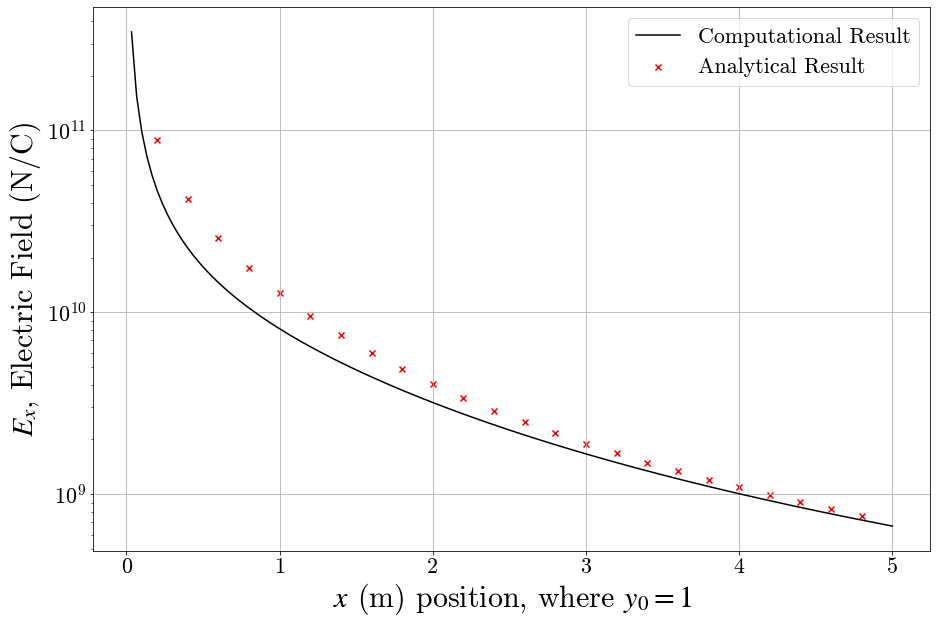

In [216]:
E11 = electric_field(0, 5, 1, 1, 100, 150)
ExTh = theory_ef(0, 5, 1)

plt.plot(E11[0], E11[1], color = 'black', label = 'Computational Result')
plt.scatter(ExTh[0], ExTh[1], label = 'Analytical Result', marker = 'x', color = 'red')

plt.yscale('log')
plt.grid()
plt.ylabel("$E_x$, Electric Field (N/C)",  fontsize = 30)
plt.xlabel("$x$ (m) position, where $y_0 = 1$",  fontsize = 30)
plt.legend()

plt.savefig('images/exercise1.png', bbox_inches='tight')

## Exercise 2: Run your code and print out relevant graphs for (a) $y_0 = 0$ m, (b) $y_0 = 1$ m, (c) $y_0 = 2$ m, (d) $y_0 = 10$ m. 

<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy


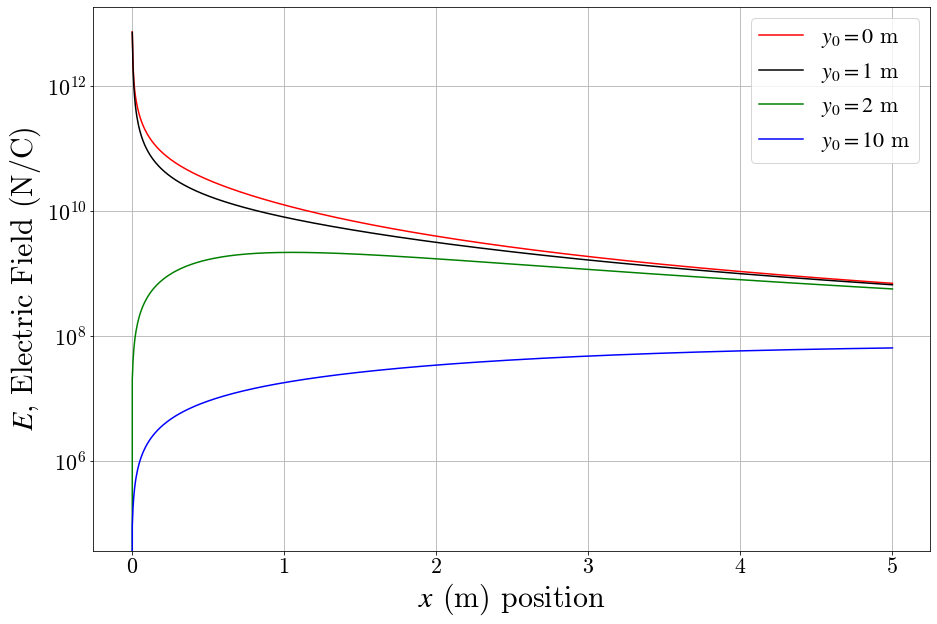

In [9]:
points = 1000

E21 = electric_field(0, 5, 1, 0, 100, points)
E22 = electric_field(0, 5, 1, 1, 100, points)
E23 = electric_field(0, 5, 1, 2, 100, points)
E24 = electric_field(0, 5, 1, 10, 100, points)

plt.plot(E21[0], E21[1], label = '$y_0 = 0$ m', color = 'red')
plt.plot(E22[0], E22[1], label = '$y_0 = 1$ m', color = 'black')
plt.plot(E23[0], E23[1], label = '$y_0 = 2$ m', color = 'green')
plt.plot(E24[0], E24[1], label = '$y_0 = 10$ m', color = 'blue')

plt.yscale('log')
plt.grid()
plt.ylabel("$E$, Electric Field (N/C)",  fontsize = 30)
plt.xlabel("$x$ (m) position",  fontsize = 30)
plt.legend()

plt.savefig('images/exercise2.png', bbox_inches='tight')

<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy


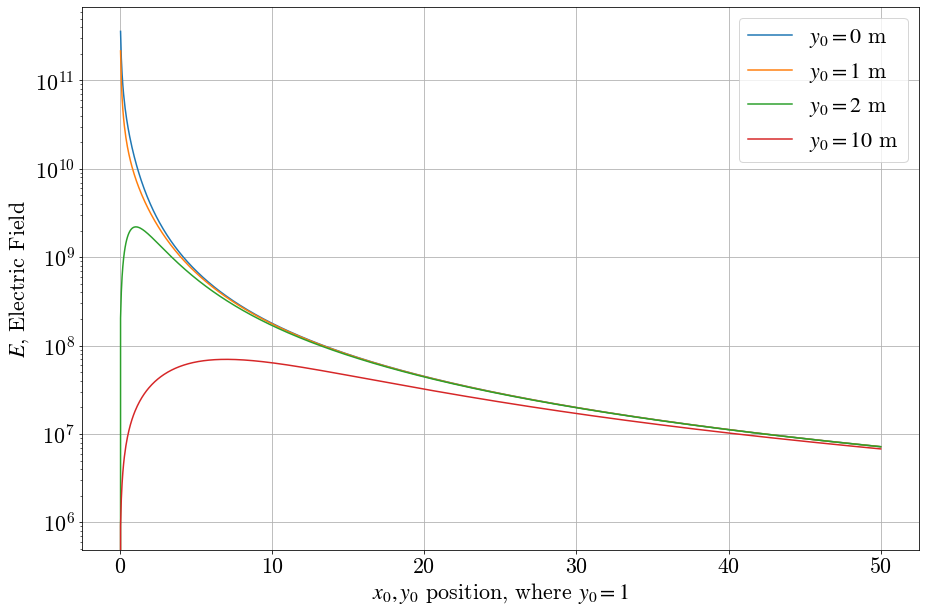

In [10]:
dist = 50
points = 1000

E21 = electric_field(0, dist, 1, 0, 100, points)
E22 = electric_field(0, dist, 1, 1, 100, points)
E23 = electric_field(0, dist, 1, 2, 100, points)
E24 = electric_field(0, dist, 1, 10, 100, points)

plt.plot(E21[0], E21[1], label = '$y_0 = 0$ m')
plt.plot(E22[0], E22[1], label = '$y_0 = 1$ m')
plt.plot(E23[0], E23[1], label = '$y_0 = 2$ m')
plt.plot(E24[0], E24[1], label = '$y_0 = 10$ m')

plt.yscale('log')
plt.grid()
plt.ylabel("$E$, Electric Field")
plt.xlabel("$x_0, y_0$ position, where $y_0 = 1$")
plt.legend()

<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy


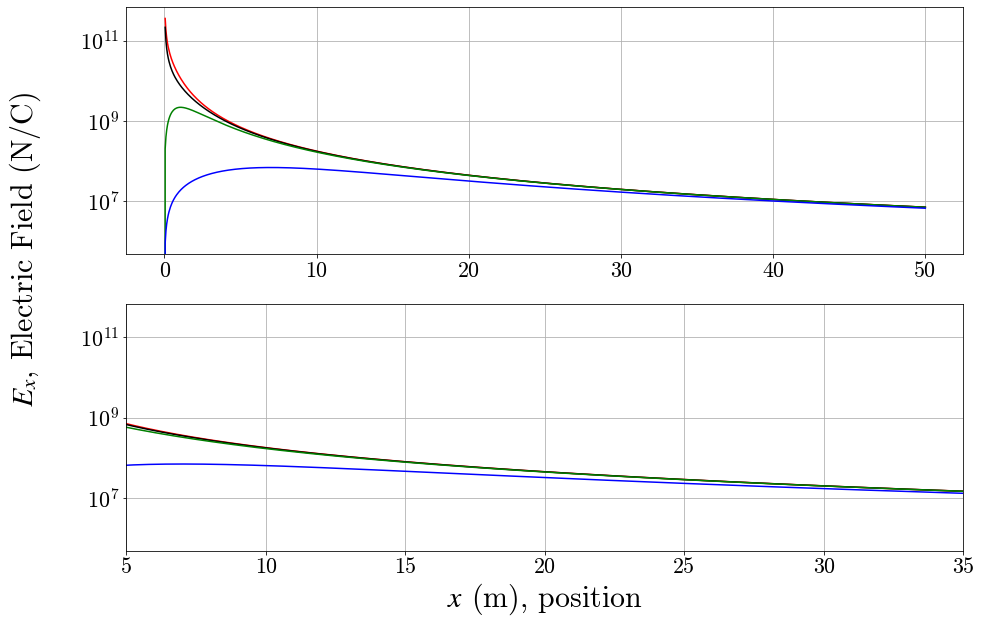

In [11]:
dist = 50
points = 1000

E21 = electric_field(0, dist, 1, 0, 100, points)
E22 = electric_field(0, dist, 1, 1, 100, points)
E23 = electric_field(0, dist, 1, 2, 100, points)
E24 = electric_field(0, dist, 1, 10, 100, points)

fig, (ax1, ax2) = plt.subplots(2)

ax1.set_yscale('log')
ax1.grid()

ax2.set_yscale('log')
ax2.grid()
ax2.set_xlim(5, 35)

ax1.plot(E21[0], E21[1], label = '$y_0 = 0$ m', color  = 'red')
ax1.plot(E22[0], E22[1], label = '$y_0 = 1$ m', color  = 'black')
ax1.plot(E23[0], E23[1], label = '$y_0 = 2$ m', color  = 'green')
ax1.plot(E24[0], E24[1], label = '$y_0 = 10$ m', color = 'blue')

ax2.plot(E21[0], E21[1], label = '$y_0 = 0$ m', color  = 'red')
ax2.plot(E22[0], E22[1], label = '$y_0 = 1$ m', color  = 'black')
ax2.plot(E23[0], E23[1], label = '$y_0 = 2$ m', color  = 'green')
ax2.plot(E24[0], E24[1], label = '$y_0 = 10$ m', color = 'blue')

plt.xlabel('$x$ (m), position',  fontsize = 30)
ax1.yaxis.set_label_coords(-.1, .02)
ax1.set_ylabel("$E_x$, Electric Field (N/C)",  fontsize = 30)

plt.savefig('images/exercise22.png', bbox_inches='tight')

##  Exercise 3: You should notice that for large values of $x_0$ the data points and the solid line (field at $y = 0$) approach the same value. Explain qualitatively why this occurs.

Please see lab report for explanation. 

## Exercise 4:  Modify your code to compute the y-component of the electric field. Run your code for the cases listed in exercise 2.

 $$ E_x(x_0, y_0) \approx \sum_{i = 1}^N \frac{x_0}{((x_0 - (L + (i - 1)\Delta x)))^2 + y_0^2)^{3/2}} \Delta x $$ 

 Here we expect that $a >> L$ then $L/a << 1$ so as $x \rightarrow 0$ the value for $E$ blows up until at $x = 0$ the $E$ magnitude goes to 0 due to symetry. Where $a$ is the tip of the rod to the point of observation.  
 
 Theortical value for this analysis at a point $P$ is given by, 
 
 $$ E_p = \frac{\lambda L}{4 \pi \epsilon_0} \left[ \frac{1}{(L/2 + x)^2} \right] $$ 

In [231]:
def electric_field_x(a, b, L, x, N, p):
    Ev = []; y_p = []; λ = 1
    C = λ/(8.854187817e-12*4*np.pi); dx = 2*L/N 

    for j in np.linspace(a, b, p): # creating points between x = 0 and x = 5 
        y = j 
        y_p.append(j) # appending array to plot y-position to corresponding E-field value with x as a constant. 
        E = 0 # setting E  to zero so summation doesn't  carry. 
        
        for i in range(1, N + 1): 
            x_i = -L + i*dx
            E = E + (x/((x - x_i)**2 + y**2)**(3/2))*dx
        Ev.append(E)

    Ev = np.array(Ev)*C ; y_p = np.array(y_p) 
    return(y_p, Ev)

def theory_ef_x(a, b, x, L): 
    λ = 1; C =  λ/(8.854187817e-12*2*np.pi);  ExTha = []; y = []
    for i in np.arange(a, b, .2):
        y = np.append(i, y) 
        r = L/2 + i
        ExTh = C*(1/r**2)
        ExTha.append(ExTh)
    return y, ExTha[::-1] 

<ipython-input-12-1c1dc38f11d9>:12: RuntimeWarning: divide by zero encountered in double_scalars
  E = E + (x/((x - x_i)**2 + y**2)**(3/2))*dx
<ipython-input-5-185c1ff5aa6b>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy


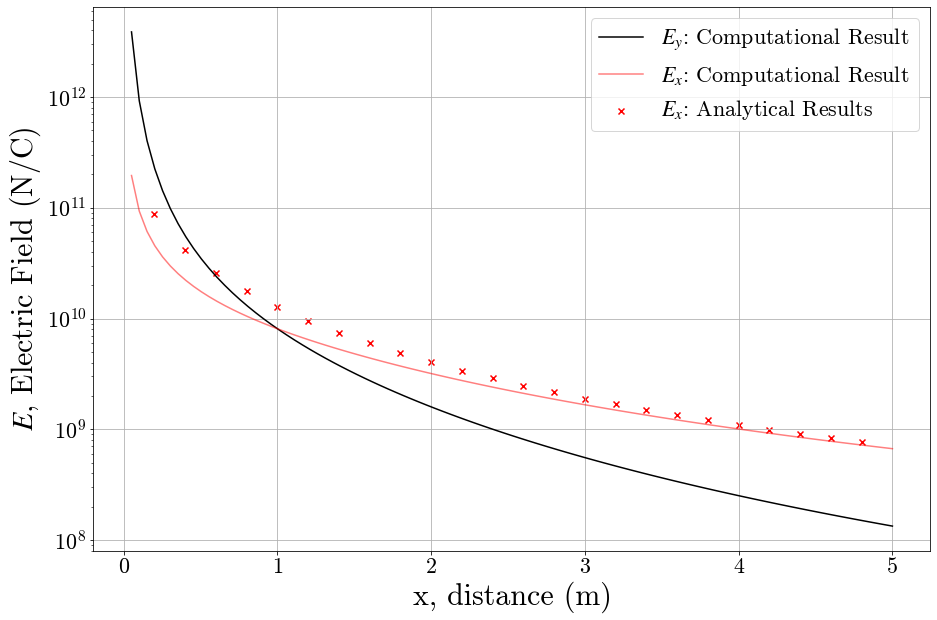

In [214]:
E4 = electric_field_x(0, 5, 1, 1, 200, 100)
E22 = electric_field(0, 5, 1, 1, 200, 100)
E4th = theory_ef_x(0, 5, 1, 1)

plt.plot(E4[0], E4[1], color = 'black', label = '$E_y$: Computational Result')
plt.plot(E22[0], E22[1], label = '$E_x$: Computational Result ', color = 'red', alpha = .5)
plt.scatter(ExTh[0], ExTh[1], label = '$E_x$: Analytical Results', marker = 'x', color = 'red')

plt.yscale('log')
plt.grid()
plt.ylabel("$E$, Electric Field (N/C)", fontsize = 30)
plt.xlabel("x, distance (m)", fontsize = 30)
plt.legend()


plt.savefig('images/exercise41.png', bbox_inches='tight')

<ipython-input-231-1688dc77d291>:12: RuntimeWarning: divide by zero encountered in double_scalars
  E = E + (x/((x - x_i)**2 + y**2)**(3/2))*dx


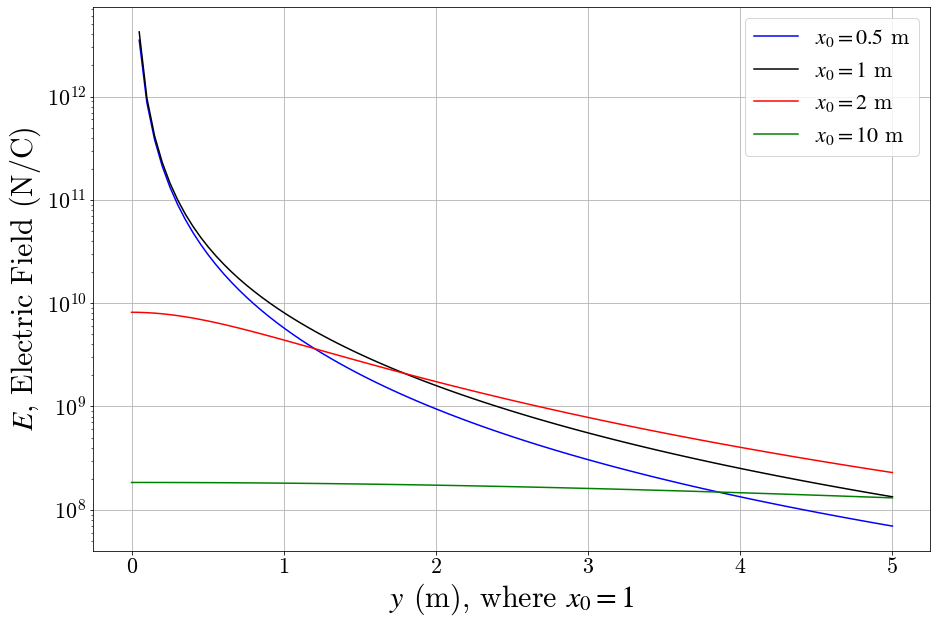

In [238]:
N = 100; p = 100

E41 = electric_field_x(0, 5, 1, 0.5, N, p)
E42 = electric_field_x(0, 5, 1, 1, N, p)
E43 = electric_field_x(0, 5, 1, 2, N, p)
E44 = electric_field_x(0, 5, 1, 10, N, p)


plt.plot(E41[0], E41[1], label = '$x_0 = 0.5$ m', color = 'blue')
plt.plot(E42[0], E42[1], label = '$x_0 = 1$ m', color = 'black')
plt.plot(E43[0], E43[1], label = '$x_0 = 2$ m', color = 'red')
plt.plot(E44[0], E44[1], label = '$x_0 = 10$ m',  color = 'green')


plt.yscale('log')
plt.grid()
plt.ylabel("$E$, Electric Field (N/C)", fontsize = '30')
plt.xlabel("$y$ (m), where $x_0 = 1$", fontsize = '30')
plt.legend()

plt.savefig('images/exercise42.png', bbox_inches='tight')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

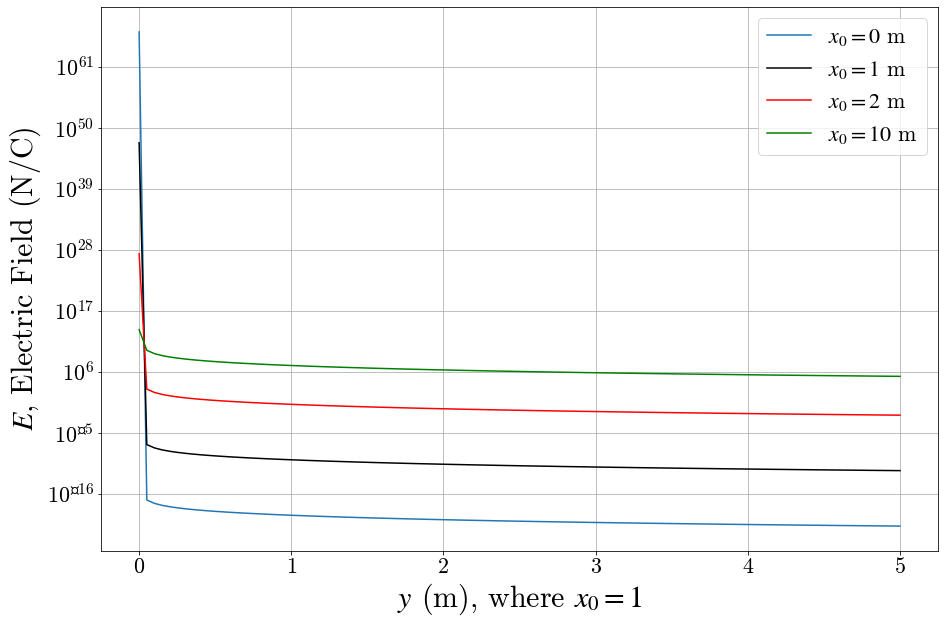

In [17]:
N = 1000; p = 100

E41 = electric_field_x(0, 5, 1, 1e-30, N, p)
E42 = electric_field_x(0, 5, 1, 1e-20, N, p)
E43 = electric_field_x(0, 5, 1, 1e-10, N, p)
E44 = electric_field_x(0, 5, 1, 1e-3, N, p)


plt.plot(E41[0], E41[1], label = '$x_0 = 0$ m')
plt.plot(E42[0], E42[1], label = '$x_0 = 1$ m', color = 'black')
plt.plot(E43[0], E43[1], label = '$x_0 = 2$ m', color = 'red')
plt.plot(E44[0], E44[1], label = '$x_0 = 10$ m',  color = 'green')


plt.yscale('log')
plt.grid()
plt.ylabel("$E$, Electric Field (N/C)", fontsize = '30')
plt.xlabel("$y$ (m), where $x_0 = 1$", fontsize = '30')
plt.legend()

## Exercise 5: Modify your code to calculate the field from a cylinder of radius $R$, as shown in Fig. 2. Take the volume charge density $\rho = 1$ C/m3 and $R = 2$. Figure 2:

![Fig. 2](fig2.PNG "Title")

 Applying Gauss's law to the cylinder we get, 

 $$ E = \frac{\lambda}{2 \pi R \epsilon_0}$$ 
 
 Analytical value is, 
 

In [18]:
def electric_field_cylinder(a, b, L, y, N, p, ρ, r):
    Ev = []; x_p = []; dy = -2*L/N
    C = (2*np.pi*r*ρ)/(8.854187817e-12)
    for j in np.linspace(a, b, p): # creating points between x = 0 and x = 5 
        x = j 
        # print(x)
        x_p.append(j) # appending array to plot x-position to corresponding E-field value with y as a constant. 
        E = 0 # setting E  to zero so summation doesn't  carry. 
        for i in range(1, N + 1): 
            y_i = -L + i*dy
            E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
        Ev.append(E)

    Ev = np.array(Ev)*C ; x_p = np.array(x_p) 
    return(x_p, Ev)

def total_charge_cylinder(rho, L, r):
    A = 2*np.pi*r*L + 2*np.pi*r**2
    return rho*A

For a hollow cylinder finite cylinder with uniform surface charge. 

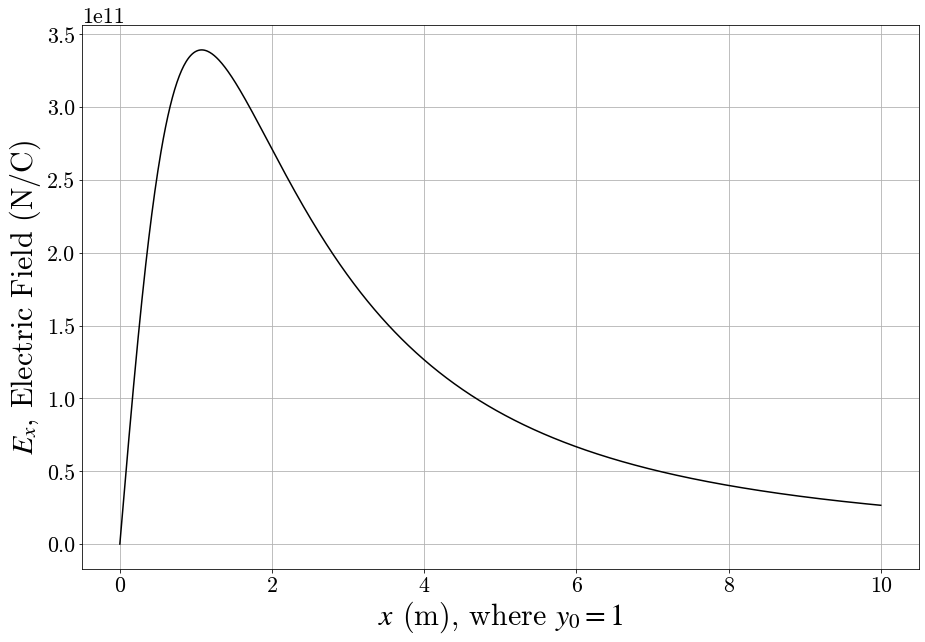

In [19]:
EC = electric_field_cylinder(0, 10, 1, 0, 100, 1000, 1, 2)
EC2 = electric_field_cylinder(0, 10, 1, 0, 100, 100, 2, 2)
EC4 = electric_field_cylinder(0, 10, 1, 0, 100, 100, 4, 2)

plt.plot(EC[0], np.abs(EC[1]), color = 'black')

plt.grid()
plt.ylabel("$E_x$, Electric Field (N/C)", fontsize = '30')
plt.xlabel("$x$ (m), where $y_0 = 1$", fontsize = '30')

plt.savefig('images/exercise51.png', bbox_inches='tight')

## Exercise 6: Modify your code to compute $E_x$ for a rod that has charge density $\lambda = +1 C/m$ for $y > 0$ and charge density $\lambda = -1 C/m$ for y < 0. Run your code for the cases listed in Exercise 2.

For this we need to calculate two parts of the electric field. One element for y > 0 and one for y < 0. This can be done by super position. This is also illustrated in the below figure. 

In [20]:
def electric_field_density_change(a, b, L, y, N, p):
    Ev = []; x_p = []; L = L/2 
    dy = 2*L/N; c = (8.854187817e-12*4*np.pi)
    C1 = 10/c; C2 = -1/c

    for j in np.linspace(a, b, p): # creating points between x = 0 and x = 5 
        x = j 
        x_p.append(j) # appending array to plot x-position to corresponding E-field value with y as a constant. 
        E = 0 # setting E  to zero so summation doesn't  carry. 
        for i in range(1, N + 1): 
            # print(i)
            y_i = -L + i*dy
            E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
        Ev.append(E)
        
    Ev = np.array(Ev)*C1 #- np.array(Ev)*C2

    x_p = np.array(x_p) 
    return(x_p, Ev)

Theortical formula for this exercise: 

$$ E_{net} = \frac{2}{4 \pi \epsilon_0 x} \left[ 1 -  \frac{x}{\sqrt{l^2/4 + x^2}} \right]$$

In [21]:
def ef_dc_th(a, b, l):
    C = (8.854187817e-12*4*np.pi); E_net = []; x = []
    
    for i in np.arange(a, b, .1):
        E = 2/(C*i)*(1 - (i/(np.sqrt((l**2/4) + i**2))))
        E_net.append(E)
        x.append(i)
        
    return E_net, x

<ipython-input-20-e014c3dde8b1>:13: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
<ipython-input-21-12503ec9cd9f>:5: RuntimeWarning: divide by zero encountered in double_scalars
  E = 2/(C*i)*(1 - (i/(np.sqrt((l**2/4) + i**2))))
<ipython-input-232-a788d57c3ed0>:12: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy


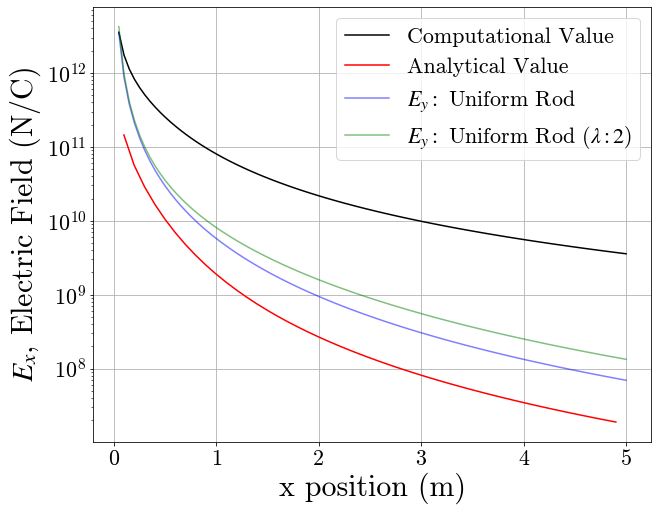

In [242]:
E = electric_field_density_change(0, 5, 1, 0, 100, 100)
Eth = ef_dc_th(0, 5, 1)
E_double = electric_field(0, 5, 1, 1, 100, 100, 2)

plt.figure(figsize=(10, 8))

plt.plot(E[0], E[1], label = 'Computational Value', color = 'black')
plt.plot(Eth[1], Eth[0], label = 'Analytical Value', color = 'red')
plt.plot(E41[0], E41[1], label = '$E_y:$ Uniform Rod ', color = 'blue', alpha = 0.5)
plt.plot(E42[0], E42[1], label = '$E_y:$ Uniform Rod ($\lambda: 2$)', color = 'Green', alpha = .5)

plt.yscale('log')
plt.grid()
plt.ylabel('$E_x$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()
plt.savefig('images/exercise61.png', bbox_inches='tight')

In [23]:
E71 = electric_field_density_change(0, 5, 1, 0, 100, 100)
E72 = electric_field_density_change(0, 5, 1, 1, 100, 100)
E73 = electric_field_density_change(0, 5, 1, 2, 100, 100)
E74 = electric_field_density_change(0, 5, 1, 10, 100, 100)

<ipython-input-20-e014c3dde8b1>:13: RuntimeWarning: invalid value encountered in double_scalars
  E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy


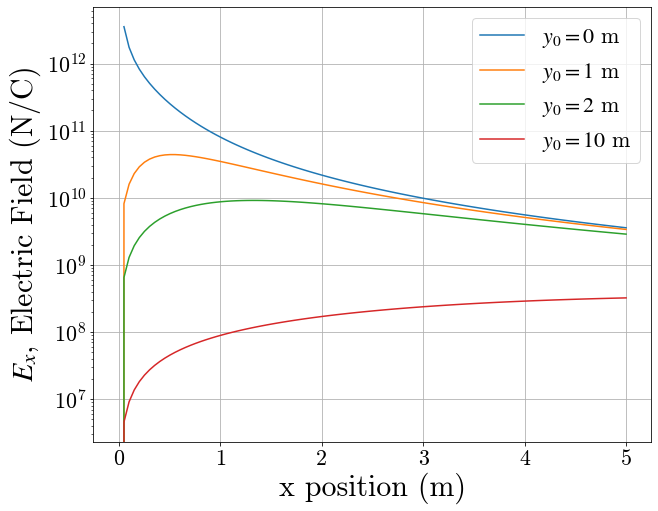

In [228]:
plt.figure(figsize=(10, 8))

plt.plot(E71[0], E71[1], label = '$y_0 = 0$ m')
plt.plot(E72[0], E72[1], label = '$y_0 = 1$ m')
plt.plot(E73[0], E73[1], label = '$y_0 = 2$ m')
plt.plot(E74[0], E74[1], label = '$y_0 = 10$ m')

plt.yscale('log')
plt.grid()
plt.ylabel('$E_x$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()
plt.savefig('images/exercise62.png', bbox_inches='tight')

## Excercise 7: Write a program to compute $E_x$ for a ring (in the $xy$ plane) of diameter $D$ with constant charge density $\lambda$. Plot $E_x(x)$ from $x = 0$ to 5 m at $y = 0$ m and $y = 3$ m. Take $D = 1$ m and $\lambda = 1$ C/m.

$$ E_p \ = \ k \int \frac{\lambda \hat{r}}{r^2} dl$$ 

In [25]:
def ring_EF(a, b, lamb, p1, p2, y):

    # --- Arrays for Co-ordinates --- 

    r = []; r_prime = []; mag = []; Ex = []; Ey = []; E = [];  final_mag_Ex = []; final_mag_Ey = [] #defining empty arrays 
    K = 1/(4*np.pi*8.854187817e-12); D = 1 # diameter of ring and constants 

    # --- Looping for various y values, where a and b are the x limits. --- 

    for i in np.linspace(a, b, p1):
        r.append(i) # creating an array of r vectors 
        r_vec = ([i, y]) # r vector used for one set of calculations 
        E = []
        
        for k in np.linspace(0, 2*np.pi, p2): 
            r_vec_prime = ([D*np.cos(k), D*np.sin(k)]) # vector from orgin to diamter at specific angle phi. 
            rt = np.array(r_vec) -  np.array(r_vec_prime) # calculation of R vector. 
            mag = np.linalg.norm(rt) # magnitude of r vector and r' vector 

            # --- calculating component of electric field 
            
            E_k = lamb*((rt)/mag**3)
            E.append(E_k)
            
        # --- Summation --- 
        
        final_mag_Ex.append(np.sum(E, axis = 0))
        
    return np.array(final_mag_Ex)*K, r

In [26]:
y1 = ring_EF(0, 5, 1, 100, 100, 1)
print(np.shape(y1[0]))

(100, 2)


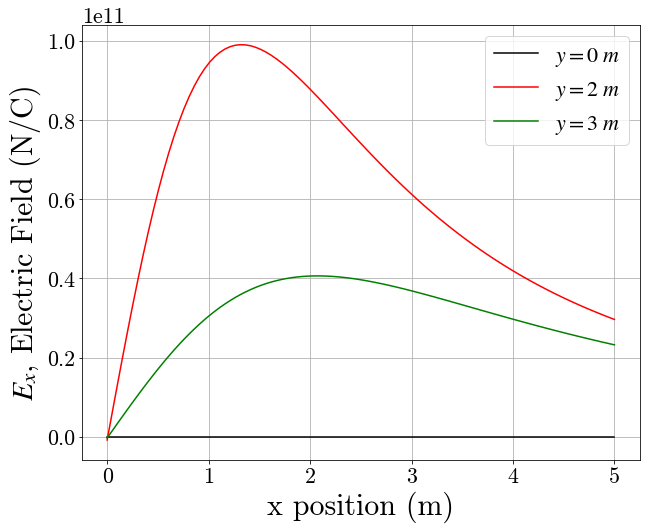

In [174]:
D = 5

y0 = ring_EF(0, D, 1, 1000, 100, 0)
y1 = ring_EF(0, D, 1, 100, 100, 1)
y2 = ring_EF(0, D, 1, 100, 100, 2)
y3 = ring_EF(0, D

, 1, 100, 100, 3)


# --- Plotting --- 

plt.figure(figsize=(10, 8))
plt.plot(y0[1], y0[0][:, 1], label = '$y = 0 \; m$', color = 'black')
plt.plot(y3[1], y2[0][:,0], label = '$y = 2 \; m$', color = 'red')
plt.plot(y3[1], y3[0][:,0], label = '$y = 3 \; m$', color = 'green')

plt.grid()
plt.ylabel('$E_x$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()
plt.savefig('images/exercise71.png', bbox_inches='tight')

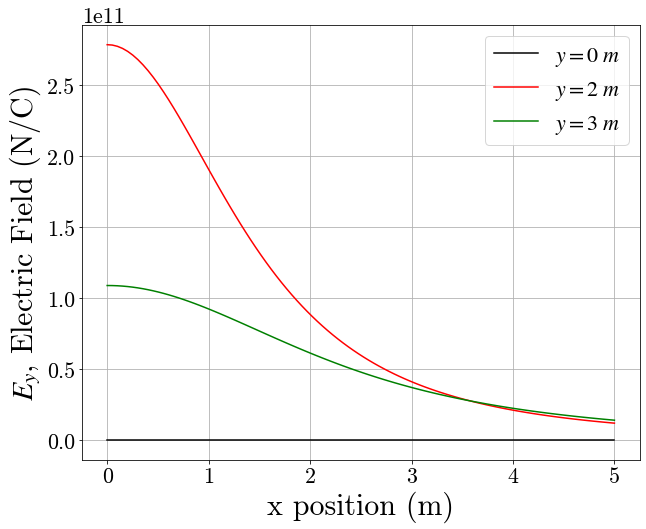

In [175]:
# --- Plotting --- 
plt.figure(figsize=(10, 8))
plt.plot(y0[1], y0[0][:,1], label = '$y = 0 \; m$', color = 'black')
# plt.plot(y1[1], y1[0][:,1], label = '$y = 1 \; m$')
plt.plot(y2[1], y2[0][:,1], label = '$y = 2 \; m$', color = 'red')
plt.plot(y3[1], y3[0][:,1], label = '$y = 3 \; m$', color = 'green')

plt.grid()
plt.ylabel('$E_y$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()
plt.savefig('images/exercise72.png', bbox_inches='tight')

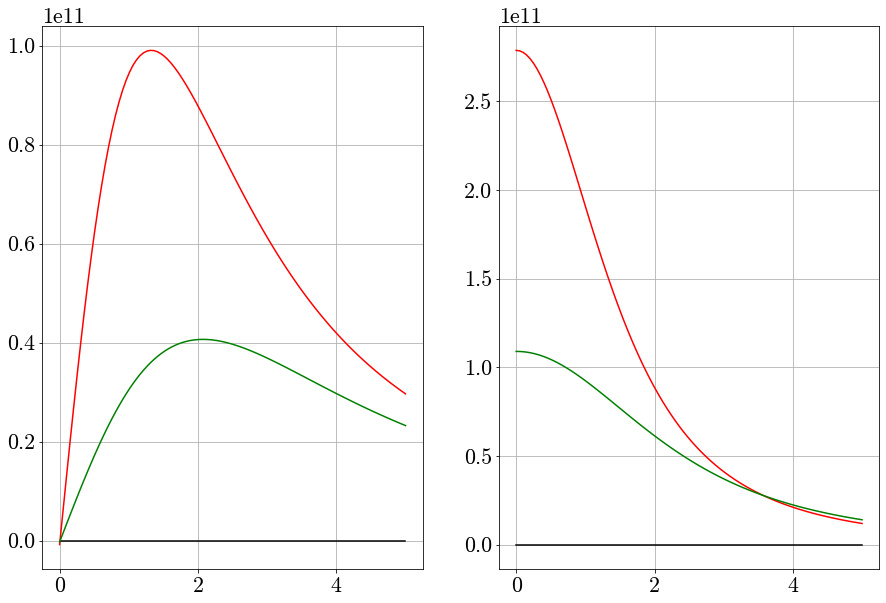

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(y0[1], y0[0][:, 1], label = '$y = 0 \; m$', color = 'black')
ax1.plot(y3[1], y2[0][:,0], label = '$y = 2 \; m$', color = 'red')
ax1.plot(y3[1], y3[0][:,0], label = '$y = 3 \; m$', color = 'green')

ax2.plot(y0[1], y0[0][:,1], label = '$y = 0 \; m$', color = 'black')
ax2.plot(y2[1], y2[0][:,1], label = '$y = 2 \; m$', color = 'red')
ax2.plot(y3[1], y3[0][:,1], label = '$y = 3 \; m$', color = 'green')

ax1.grid()
ax2.grid()

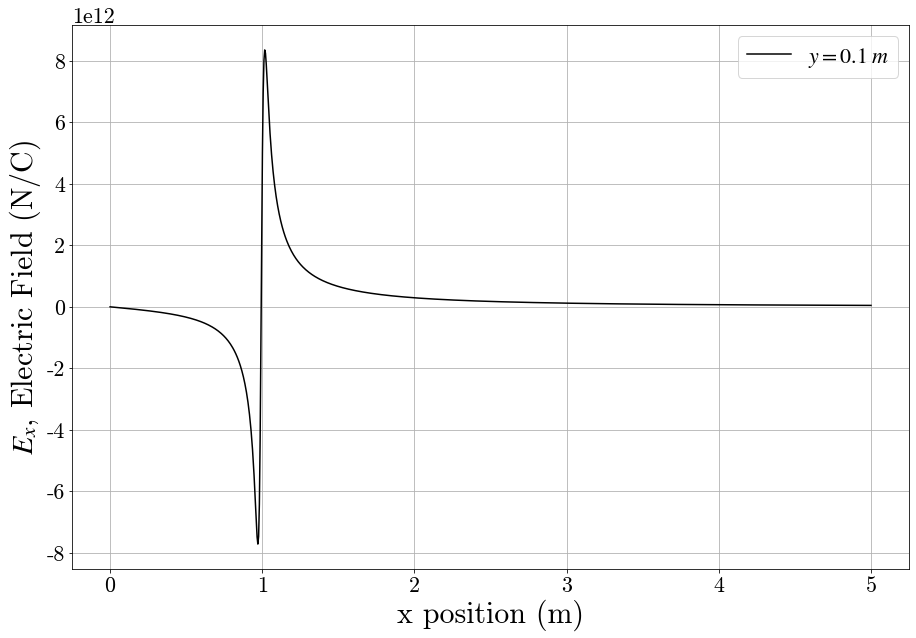

In [177]:

y0 = ring_EF(0, 5, 1, 1000, 100, 0.1)
y1 = ring_EF(0, 5, 1, 100, 100, .3)
y2 = ring_EF(0, 5, 1, 100, 100, .5)
y3 = ring_EF(0, 5, 1, 100, 100, .7)
Y1 = ring_EF(0, 5, 1, 100, 100, 1)

# --- Plotting --- 

plt.plot(y0[1], y0[0][:, 0], label = '$y = 0.1 \; m$', color = 'black')

plt.grid()
plt.ylabel('$E_x$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()

plt.savefig('images/exercise73.png', bbox_inches='tight')

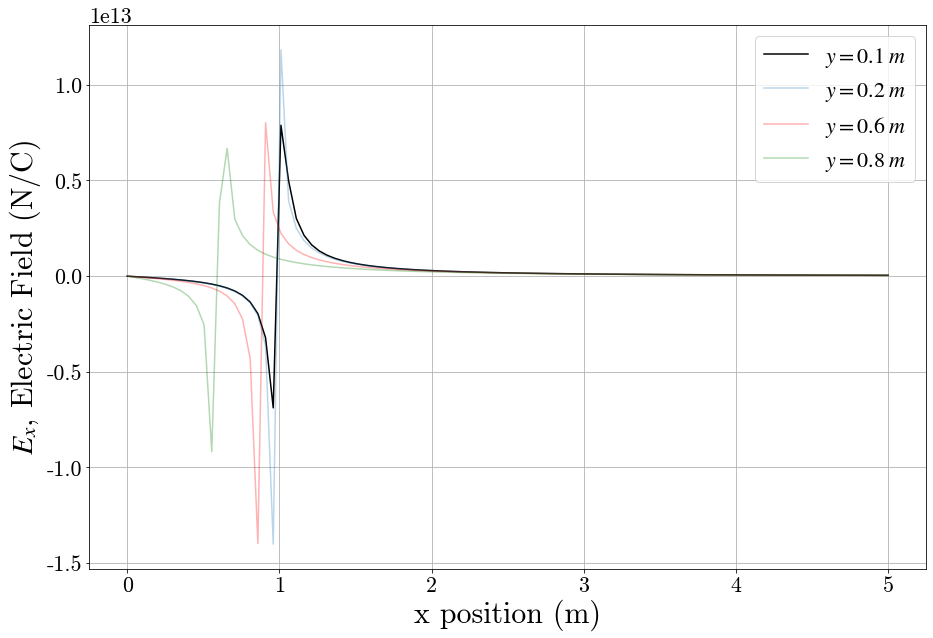

In [212]:

y0 = ring_EF(0, 5, 1, 100, 100, 0.1)
y1 = ring_EF(0, 5, 1, 100, 100, .2)
y2 = ring_EF(0, 5, 1, 100, 100, .5)
y3 = ring_EF(0, 5, 1, 100, 100, .8)
Y1 = ring_EF(0, 5, 1, 100, 100, 1)

# --- Plotting --- 

plt.plot(y0[1], y0[0][:, 0], label = '$y = 0.1 \; m$', color = 'black')
plt.plot(y3[1], y1[0][:,0], label = '$y = 0.2 \; m$', alpha = 0.3)
plt.plot(y3[1], y2[0][:,0], label = '$y = 0.6 \; m$', color = 'red', alpha = 0.3)
plt.plot(y3[1], y3[0][:,0], label = '$y = 0.8 \; m$', color = 'green', alpha = 0.3)

plt.grid()
plt.ylabel('$E_x$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()

plt.savefig('images/exercise74.png', bbox_inches='tight')

## Excercise 8: 

In [179]:
def box_rod(L, p):
    s1 = []; s2 = [] # defining empty arrays. 
    
    for k in np.linspace(-.5*L, .5*L, p): # Loop that creates one line charge (box side) around orgin at 1/2 L 
        s1.append(k)
        s2 = np.full(p, .5/L) # array that creates constant values to construct one side 

    s1 = np.array(s1)

    x = np.concatenate((s2, -s2, s1, -s1)) # different combinations of these to arrays form the box w/ orgin @ ctr.
    y = np.concatenate((s1, s1, -s2, s2))
    
    return np.swapaxes([x, y],0,1)

t = box_rod(1, 10)

print(len(t))

40


In [180]:
def square_EF(a, b, lamb, p1, p2, y, L):

    # --- Arrays for Co-ordinates --- 

    r = []; Ex = []; Ey = []; E = [];  final_mag_E = [] #defining empty arrays 
    K = 1/(4*np.pi*8.854187817e-12); D = 1 # diameter of ring and constants 

    # --- Looping for various y values, where a and b are the x limits. --- 

    for i in np.linspace(a, b, p1):
        r.append(i) # creating an array of r vectors 
        r_vec = ([i, y]) # r vector used for one set of calculations 
        E = []
        r_vec_prime = (box_rod(L, p2))
        
        for k in range(0, len(r_vec_prime)):
            rt = np.array(r_vec) -  np.array(r_vec_prime[k]) # calculation of R vector. 
            mag = np.linalg.norm(rt) # magnitude of r vector and r' vector 

            # --- calculating component of electric field 

            E_k = lamb*((rt)/mag**3)
            E.append(E_k)

        # --- Summation --- 

        final_mag_E.append(np.sum(E, axis = 0))
        
    return np.array(final_mag_E)*K, r

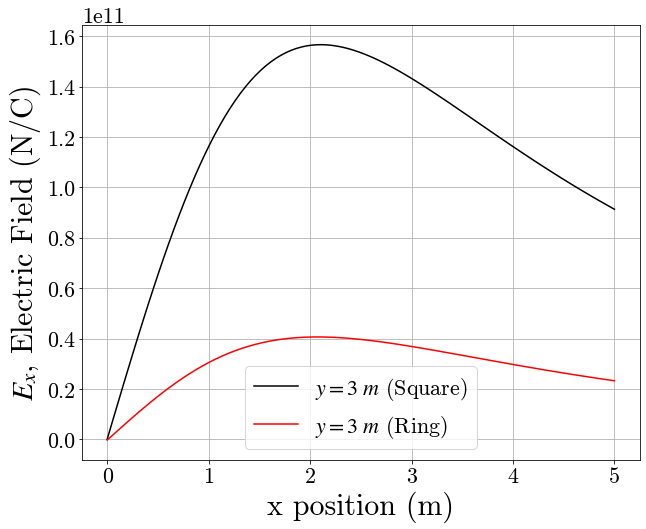

In [181]:
E93 = square_EF(0, 5, 1, 100, 100, 3, 1)
y3 = ring_EF(0, 5, 1, 1000, 100, 3)

# --- Plotting --- 
plt.figure(figsize=(10, 8))
plt.plot(E93[1], E93[0][:,0], label = '$y = 3 \; m$ (Square)', color = 'black')
plt.plot(y3[1], y3[0][:,0], label = '$y = 3 \; m$ (Ring)', color = 'red')

# plt.yscale('log')
plt.grid()
plt.ylabel('$E_x$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()
plt.savefig('images/exercise81.png', bbox_inches='tight')

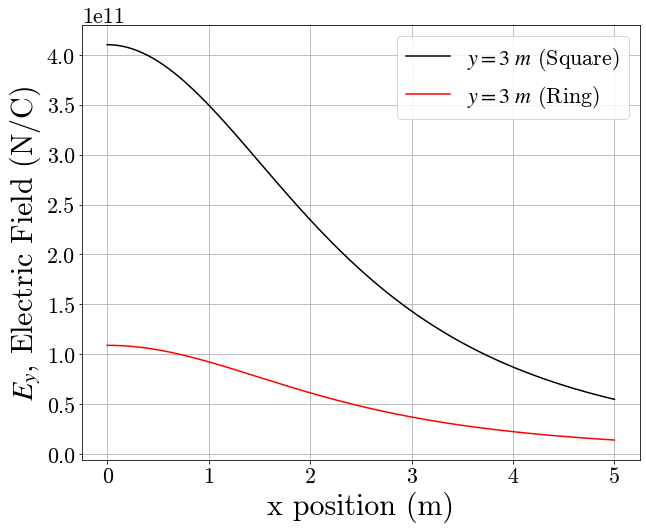

In [182]:
# --- Plotting --- 
plt.figure(figsize=(10, 8))
plt.plot(E93[1], E93[0][:,1], label = '$y = 3 \; m$ (Square)', color = 'black')
plt.plot(y3[1], y3[0][:,1], label = '$y = 3 \; m$ (Ring)', color = 'red')

plt.grid()
plt.ylabel('$E_y$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.legend()
plt.savefig('images/exercise82.png', bbox_inches='tight')

## Exercise 9: Write a program to compute the potential V (x; y) on a square x:[-5m: +5m], y:x:[-5m: +5m]. Draw a colour map of the result.

The relationship between electric field and potiential is as follows, 

$$E_x = - \frac{dV}{dx} $$

This result just completes a line from 0, 5 above the square at a specified $y$ we need to repeat this step for a square, so repeat it four times somewhat has we did with definition of the box_rod function above. 

In [183]:
Square_Field_Top = square_EF(-5, 5, 1, 100, 100, 5, 1)
Square_Field_Bottom = square_EF(-5, 5, 1, 100, 100, -5, 1) 

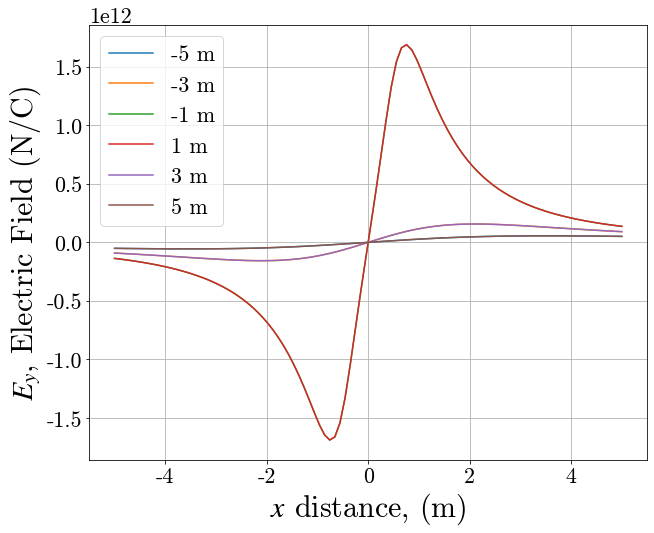

In [184]:
# --- Plotting --- 
plt.figure(figsize=(10, 8))
for i in range(-5, 6, 2):
    plt.plot(square_EF(-5, 5, 1, 100, 100, i, 1)[1], square_EF(-5, 5, 1, 100, 100, i, 1)[0][:,0], label = '%s m' % i)

plt.grid()
plt.ylabel('$E_y$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.xlabel("$x$ distance, (m)")
plt.legend()
plt.savefig('images/exercise83.png', bbox_inches='tight')

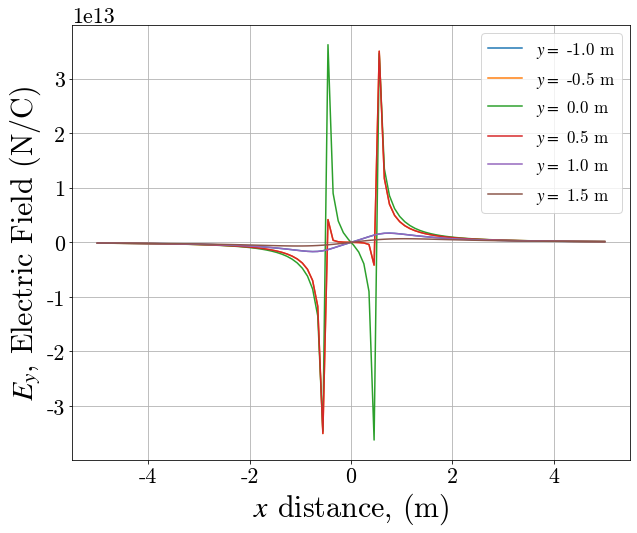

In [205]:
# --- Plotting --- 
plt.figure(figsize=(10, 8))
for i in np.arange(-1, 2, .5):
    plt.plot(square_EF(-5, 5, 1, 100, 100, i, 1)[1], square_EF(-5, 5, 1, 100, 100, i, 1)[0][:,0], label = '$y = $ %s m' % i)


plt.grid()
plt.ylabel('$E_y$, Electric Field (N/C)', fontsize = 30)
plt.xlabel('x position (m)', fontsize = 30)
plt.xlabel("$x$ distance, (m)")
plt.legend( prop={'size': 17})
plt.savefig('images/exercise85.png', bbox_inches='tight')

Defining a function for potiential. 

$$ V = \frac{1}{4 \pi \epsilon_0 } \sum \frac{q}{r - r'} = k \sum \frac{q}{r - r'}$$

In [186]:
def square_V(a, b, lamb, p1, p2, y, L):

    # --- Arrays for Co-ordinates --- 

    r = []; Ex = []; V = []; total_V = []; x_values = []; y_values = [] #defining empty arrays 
    K = 1/(4*np.pi*8.854187817e-12); D = 1 # diameter of ring and constants 

    # --- Looping for various y values, where a and b are the x limits. --- 

    for i in np.linspace(a, b, p1):
        x_values.append(i) # creating an array of r vectors 
        y_values.append(y)
        r_vec = ([i, y]) # r vector used for one set of calculations 
        E = []
        r_vec_prime = (box_rod(L, p2))
        
        for k in range(0, len(r_vec_prime)):
            rt = np.array(r_vec) -  np.array(r_vec_prime[k]) # calculation of R vector. 
            mag = np.linalg.norm(rt) # magnitude of r vector and r' vector 

            # --- calculating component of electric field 

            E_k = lamb/rt # potiential calculation. 
            V.append(E_k[0])

        # --- Summation --- 

        total_V.append(np.sum(V, axis = 0))
        
    return x_values, y_values, np.array(total_V)*K

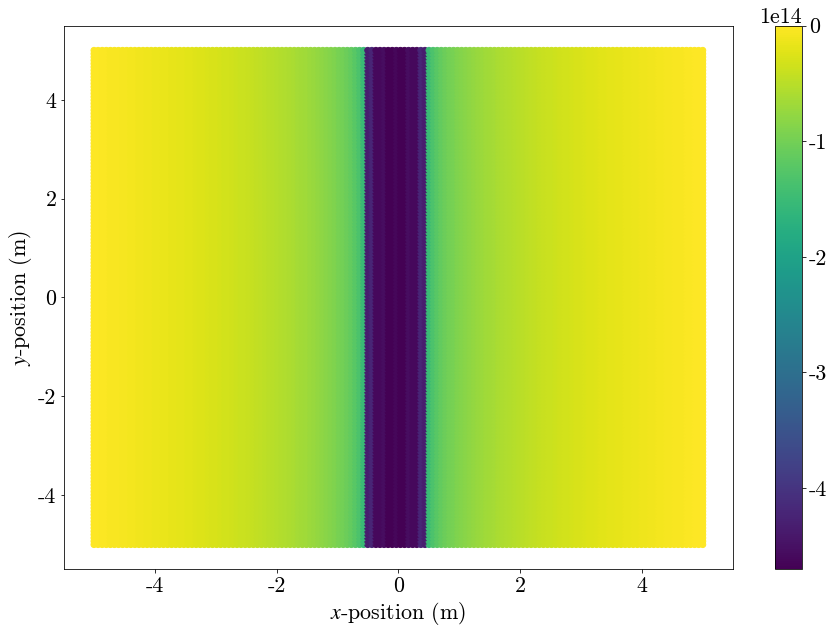

In [187]:
for i in np.linspace(-5, 5, 150):
    T = square_V(-5, 5, 1, 150, 100, i, 1)
    plt.scatter(T[0], T[1], c = T[2])
    
plt.colorbar()
plt.xlabel("$x$-position (m)")
plt.ylabel("$y$-position (m)")

plt.savefig('images/heatmap.png', bbox_inches='tight')